Name: Dhyan Navneeth V
Roll No: 25
Dept: ECE
Enter binary sequence: 0101010011100


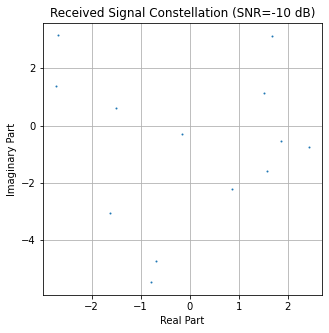

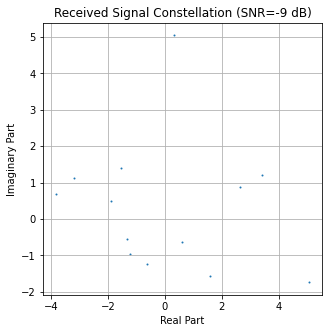

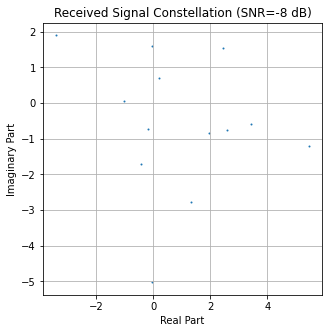

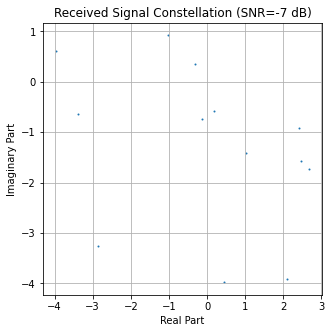

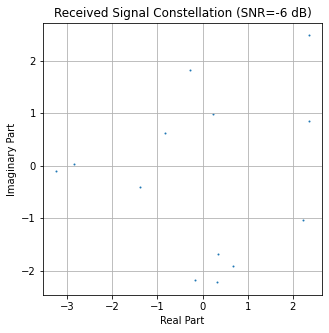

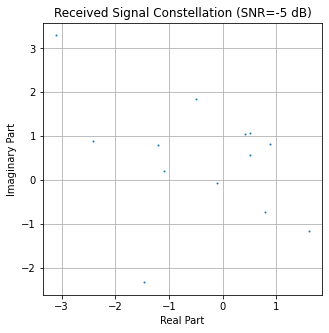

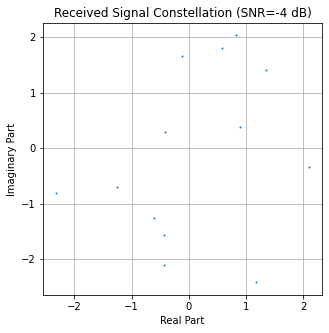

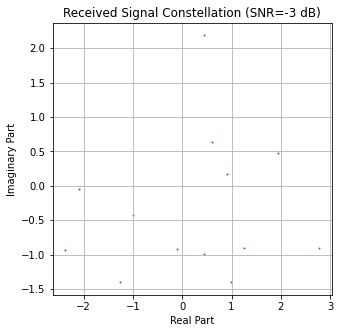

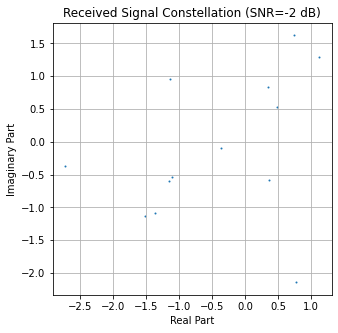

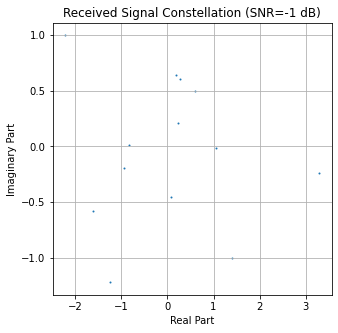

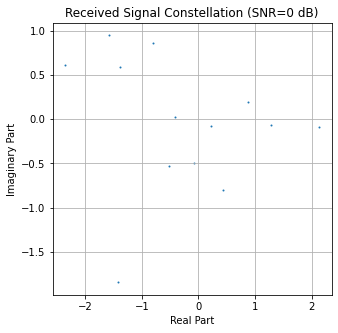

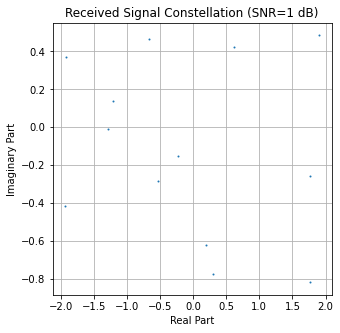

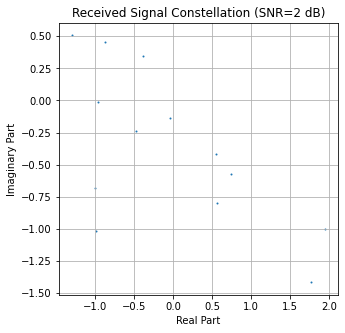

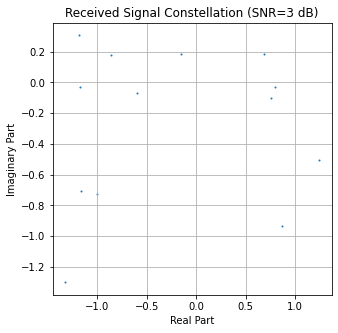

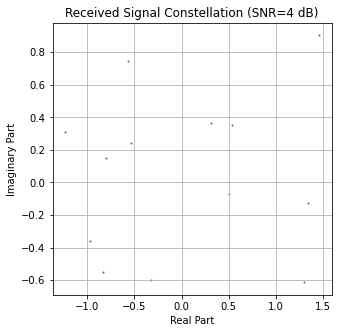

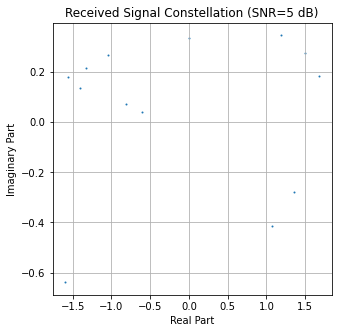

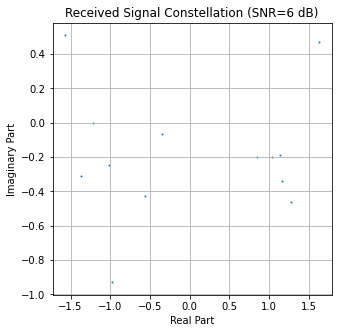

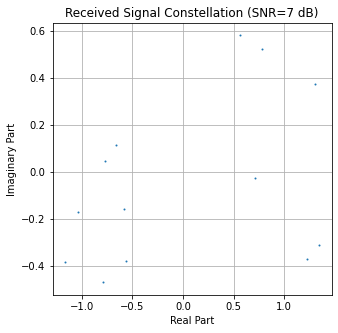

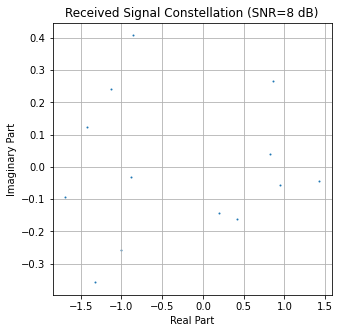

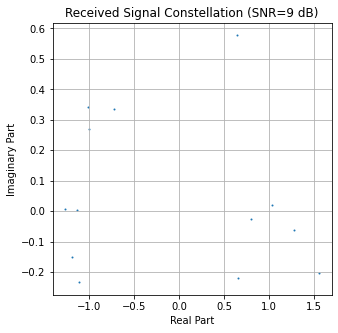

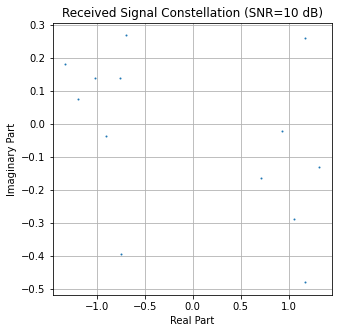

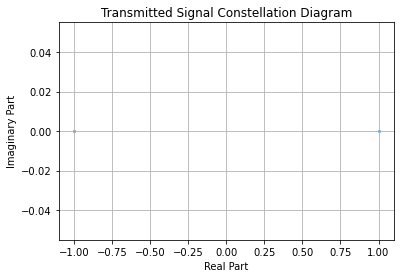

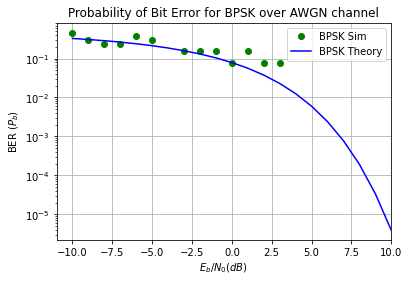

In [1]:
import numpy as np
from scipy.special import erfc
import matplotlib.pyplot as plt

print("Name: Dhyan Navneeth V")
print("Roll No: 25")
print("Dept: ECE")

# Input binary code
binary_input = input("Enter binary sequence: ")

# Convert binary string to array
binary_image = np.array(list(binary_input))

# Convert 0 to -1 and 1 to 1
transmitted_signal = np.array([1 if i == '1' else -1 for i in binary_image])

# Initialize BER list
BER_sim = []

# Loop through SNR values
for s in range(-10, 11, 1):
    fig, ax = plt.subplots(figsize=(5, 5))
    snr_db = s
    snr = 10 ** (snr_db / 10)

    # Generate noise
    noise = np.random.normal(0, np.sqrt(snr / 2), len(binary_image)) + \
            1j * np.random.normal(0, np.sqrt(snr / 2), len(binary_image))

    # Scale noise
    noise_power = np.var(noise)
    signal_power = 1
    scale_factor = np.sqrt(signal_power / (snr * noise_power))
    noise *= scale_factor

    # Received signal
    received_signal = transmitted_signal + noise

    # Scatter Plot (Constellation Diagram)
    ax.scatter(received_signal.real, received_signal.imag, s=1)
    ax.set_xlabel('Real Part')
    ax.set_ylabel('Imaginary Part')
    ax.set_title(f'Received Signal Constellation (SNR={s} dB)')
    ax.grid(True)
    plt.show()

    # Calculate BER
    ml_decoded_signal = np.array([1 if (i-1)**2 < (i+1)**2 else -1 for i in received_signal])
    error = np.sum(ml_decoded_signal != transmitted_signal)
    BER_sim.append(error / len(ml_decoded_signal))

# Plot the transmitted signal constellation
tx_fig = plt.figure()
plt.scatter(transmitted_signal.real, transmitted_signal.imag, s=1)
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Transmitted Signal Constellation Diagram')
plt.grid(True)
plt.show()

# Calculate BER theoretically
snr_db = np.arange(-10, 11, 1)
BER_theory = 0.5 * erfc(np.sqrt(10**(snr_db / 10)))

# Plot BER vs SNR
fig, ax = plt.subplots()
ax.semilogy(snr_db, BER_sim, 'go', linestyle='', label='BPSK Sim')
ax.semilogy(snr_db, BER_theory, 'b-', label='BPSK Theory')
ax.set_xlabel('$E_b/N_0(dB)$')
ax.set_ylabel('BER ($P_b$)')
ax.set_title('Probability of Bit Error for BPSK over AWGN channel')
ax.legend()
ax.set_xlim(-11, 10)
ax.grid(True)
plt.show()
